In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# loading data
csvpath = Path('C:\\Users\\willu\\Documents\\NBA-ML-Project\\combined_df.csv')
teamstats_df = pd.read_csv(csvpath)
teamstats_df = teamstats_df.set_index('GAMEDATE')
teamstats_df2 =teamstats_df.copy()

In [3]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
# teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE','+/-','PTS'])

In [4]:
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0','H_H/A',
                                          'H_TEAM',
                                          'A_TEAM',
                                          'H_TEAM1',
                                          'H_TEAM2',
                                          'A_TEAM1',
                                          'A_TEAM2',
                                          'GAMEDATE.1',
                                          'A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])

In [5]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('H_W/L', axis=1, inplace=True)
X.head(16)

,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,H_AST,...,A_3PA,A_3P%,A_FT%,A_OREB,A_DREB,A_AST,A_TOV,A_STL,A_BLK,A_PF
GAMEDATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,53,92,45.7,14,28,50.0,59.3,11,35,25,...,27,33.3,86.4,9,38,27,12,5,6,21
2014-01-03,48,80,46.3,10,31,32.3,84.2,7,34,23,...,27,22.2,68.0,13,34,30,21,15,7,17
2020-01-04,48,82,51.2,10,32,31.3,91.7,4,36,22,...,27,37.0,82.9,13,26,24,11,8,4,24
2012-01-05,63,94,38.3,6,22,27.3,67.4,15,36,22,...,28,28.6,78.3,14,42,25,22,6,6,35
2013-01-05,48,68,41.2,10,29,34.5,78.9,8,28,18,...,16,18.8,66.7,16,28,27,13,11,4,15
2016-01-05,48,87,42.5,15,39,38.5,63.2,14,27,22,...,18,27.8,91.7,11,35,20,9,7,6,20
2019-01-06,48,91,47.3,10,24,41.7,76.9,14,45,25,...,34,14.7,55.6,12,29,23,14,11,7,17
2020-01-06,48,77,45.5,18,39,46.2,84.4,4,30,24,...,27,33.3,74.1,7,34,27,4,4,6,23
2012-01-07,48,83,56.6,9,12,75.0,100.0,4,27,32,...,14,42.9,80.0,17,26,21,20,8,5,9


In [6]:
# defining target vector
# y=teamstats_df['H_W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['H_W/L'].ravel()
y[:5]

array(['W', 'L', 'W', 'L', 'L'], dtype=object)

In [7]:
# converting 'W/L' to 0/1's
y=teamstats_df['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

GAMEDATE
2017-01-01    1
2014-01-03    0
2020-01-04    1
2012-01-05    0
2013-01-05    0
Name: H_W/L, dtype: int64

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=4,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.817
Accuracy score (validation): 0.820

Learning rate:  0.1
Accuracy score (training): 0.855
Accuracy score (validation): 0.852

Learning rate:  0.25
Accuracy score (training): 0.901
Accuracy score (validation): 0.873

Learning rate:  0.5
Accuracy score (training): 0.930
Accuracy score (validation): 0.897

Learning rate:  0.75
Accuracy score (training): 0.937
Accuracy score (validation): 0.892

Learning rate:  1
Accuracy score (training): 0.938
Accuracy score (validation): 0.889



In [12]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=400,
                                        learning_rate=0.75,
                                        max_features=6,
                                        max_depth=4,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,0


In [13]:
 # Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9353218210361067


In [14]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,1243,103
Actual 1,103,1736


In [15]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1346
           1       0.94      0.94      0.94      1839

    accuracy                           0.94      3185
   macro avg       0.93      0.93      0.93      3185
weighted avg       0.94      0.94      0.94      3185



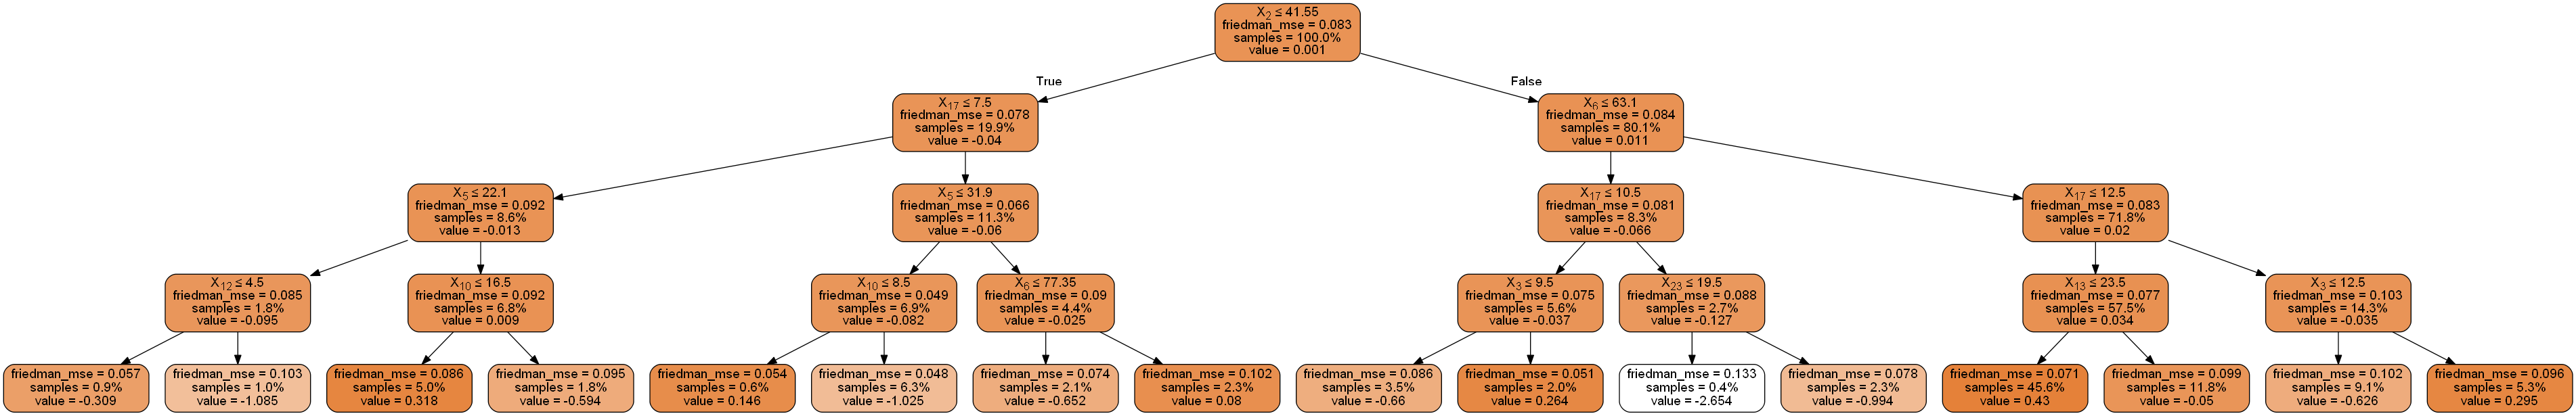

In [16]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [17]:
teamstats_df2

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,...,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
GAMEDATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,ATL,ATL,vs,SAS,W,53,114,42,92,...,86.4,9,38,47,27,12,5,6,21,-2
2014-01-03,1,ATL,ATL,vs,GSW,L,48,100,37,80,...,68.0,13,34,47,30,21,15,7,17,1
2020-01-04,2,ATL,ATL,vs,IND,W,48,116,42,82,...,82.9,13,26,39,24,11,8,4,24,-5
2012-01-05,3,ATL,ATL,vs,MIA,L,63,109,36,94,...,78.3,14,42,56,25,22,6,6,35,7
2013-01-05,4,ATL,ATL,vs,BOS,L,48,81,28,68,...,66.7,16,28,44,27,13,11,4,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,12733,WAS,WAS,vs,CHA,L,48,104,41,100,...,84.2,9,41,50,24,14,6,6,17,10
2021-03-04,12734,WAS,WAS,vs,LAC,W,48,119,40,88,...,92.6,10,35,45,24,19,4,4,31,-2
2021-04-16,12735,WAS,WAS,vs,NOP,W,53,117,45,96,...,84.8,11,45,56,26,16,11,7,22,-2


In [20]:
def display2(predictions, X_test):
    for g in range(len(predictions)):
        win_prob = round(predictions[g],2)
        team1 = teamstats_df2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_TEAM1']
        team2 = teamstats_df2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_TEAM2']
        W_L = teamstats_df2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_W/L']
        print(f' {team1} have a probability of {win_prob} of beating {team2}: {W_L}.')

In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight='balanced', random_state=None, 
                   solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0)


clf.fit(X_train, np.ravel(y_train))
y_pred2 = clf.predict_proba(X_test)
y_pred2 = y_pred2[:,1]

display2(y_pred2,X_test)

 ATL have a probability of 1.0 of beating  SAS: W.
 ATL have a probability of 1.0 of beating GSW: L.
 ATL have a probability of 0.0 of beating  IND: W.
 ATL have a probability of 1.0 of beating MIA: L.
 ATL have a probability of 0.98 of beating BOS: L.
 ATL have a probability of 1.0 of beating  NYK: L.
 ATL have a probability of 0.01 of beating  MIA: W.
 ATL have a probability of 1.0 of beating  DEN: L.
 ATL have a probability of 0.99 of beating CHI: W.
 ATL have a probability of 0.06 of beating MEM: W.
 ATL have a probability of 0.98 of beating IND: W.
 ATL have a probability of 0.01 of beating IND: W.
 ATL have a probability of 0.84 of beating  HOU: L.
 ATL have a probability of 0.0 of beating  CHI: W.
 ATL have a probability of 0.98 of beating HOU: W.
 ATL have a probability of 0.0 of beating UTA: W.
 ATL have a probability of 1.0 of beating WAS: W.
 ATL have a probability of 0.95 of beating CHA: W.
 ATL have a probability of 1.0 of beating  BKN: L.
 ATL have a probability of 1.0 of